# Thinking in tensors in PyTorch

Deep learning for neuroscientists - hands-on training  by [Piotr Migdał](https://p.migdal.pl) (2019). Version 0.2.



## Notebook 3: Gradient descent


> X: I want to learn Deep Learning.  
> Me: Do you know what is gradient?  
> X: Yes  
> Me: Then, it an easy way downhill!

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

$$y = x^2$$

$$ \frac{\partial y}{\partial x} = 2 x$$

For $y^2$ we can calculate it:

$$\lim_{x \to 0} \frac{y(x + h) - y(x)} {h}$$

Limit is a mathematic tool for 

$$\frac{x^2 + 2 x h + h^2 - x^2}{h} = 2 x + h $$

In [5]:
X = np.linspace(-4, 4, num=100)
Y = X**2

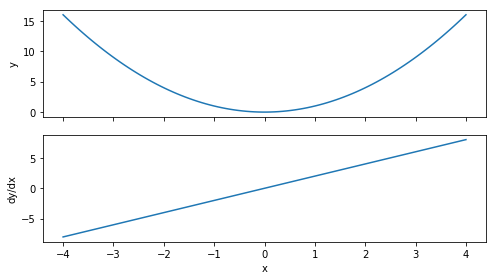

In [6]:
# EDIT: it seem to look better when on a different plot
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7, 4))

ax0.plot(X, Y)
ax0.set(title='', xlabel='', ylabel='y')

ax1.plot(X, 2 * X)
ax1.set(title='', xlabel='x', ylabel='dy/dx')

fig.tight_layout()

# or maybe Bokeh with mouseover

## Numerical derivative in NumPy

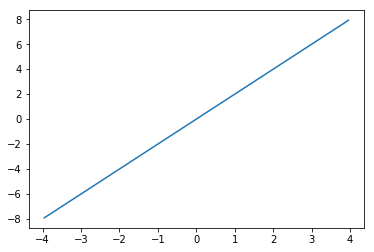

In [7]:
# we can go it automatically
plt.plot((X[1:] + X[:-1]) / 2, np.diff(Y) / np.diff(X))

## Symbolic derivative in PyTorch

In [8]:
x = torch.tensor(10., requires_grad=True)
y = x.pow(2)
y2 = x.pow(4)
y.backward()
y2.backward()

# y
y

# dy / dx
x.grad

tensor(4020.)

In [9]:
x.grad.data.zero_()

tensor(0.)

## Gradient descent

In [14]:
lr = 0.005
x0 = 4.

xs = [x0]
x = torch.tensor(x0, requires_grad=True)

for i in range(10):
    y = x.pow(2)
    y.backward()
    x.data.add_(- lr * x.grad.data)
    x.grad.data.zero_()
    xs.append(x.item())

xs

[4.0,
 3.9600000381469727,
 3.9204001426696777,
 3.8811960220336914,
 3.842384099960327,
 3.8039603233337402,
 3.765920639038086,
 3.7282614707946777,
 3.690978765487671,
 3.654068946838379,
 3.617528200149536]

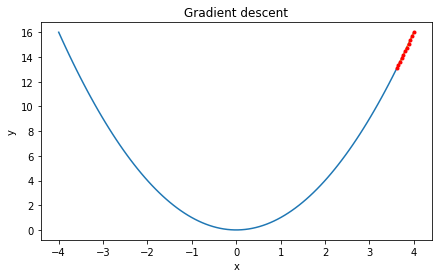

In [15]:
points_X = np.array(xs)
points_Y = points_X**2

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 4))
ax.plot(X, Y)
ax.plot(points_X, points_Y, '-')
ax.plot(points_X, points_Y, 'r.')
ax.set(title='Gradient descent', xlabel='x', ylabel='y');

## Exercise

Try other learning rates, e.g.:

* 0.1
* 0.5
* 0.75
* 1.
* 1.5
* -0.5

## Slightly more complex function

In [26]:
def poly(x):
    return x - 4 * x**2 + 0.25 * x**4

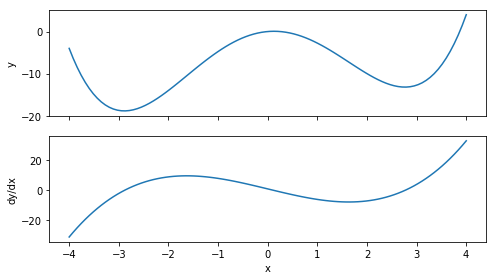

In [28]:
X = np.linspace(-4, 4, num=100)

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7, 4))

ax0.plot(X, poly(X))
ax0.set(title='', xlabel='', ylabel='y')

ax1.plot(X, 1 - 4 * 2 * X + X**3)
ax1.set(title='', xlabel='x', ylabel='dy/dx')

fig.tight_layout()

In [29]:
lr = 0.1
x0 = 4.

xs = [x0]
x = torch.tensor(x0, requires_grad=True)

for i in range(10):
    y = poly(x)
    y.backward()
    x.data.add_(- lr * x.grad.data)
    x.grad.data.zero_()
    xs.append(x.item())

xs

[4.0,
 0.7000000476837158,
 1.1257001161575317,
 1.7836114168167114,
 2.5430855751037598,
 2.8328683376312256,
 2.725745677947998,
 2.7811977863311768,
 2.754882574081421,
 2.7680041790008545,
 2.7616050243377686]

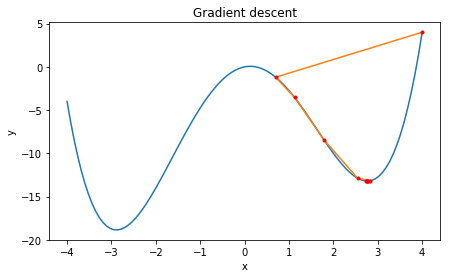

In [30]:
points_X = np.array(xs)
points_Y = poly(points_X)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 4))
ax.plot(X, poly(X))
ax.plot(points_X, points_Y, '-')
ax.plot(points_X, points_Y, 'r.')
ax.set(title='Gradient descent', xlabel='x', ylabel='y');

## Gradient descent 2d

In [31]:
X0_ = np.linspace(-4, 4, num=100)
X1_ = np.linspace(-4, 4, num=100)

In [32]:
X0, X1 = np.meshgrid(X0_, X1_)

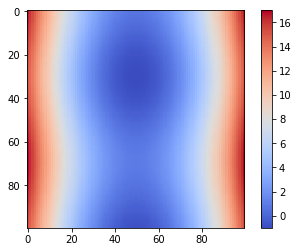

In [33]:
plt.imshow(X0**2 + np.sin(X1), cmap='coolwarm')
plt.colorbar()

Or, let's draw a [contour plot](https://en.wikipedia.org/wiki/Contour_line), well known from topographic maps.

<a list of 14 text.Text objects>

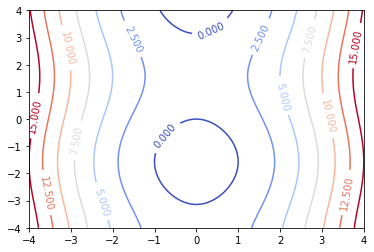

In [34]:
cs = plt.contour(X0, X1, X0**2 + np.sin(X1), cmap='coolwarm')
plt.clabel(cs, inline=1, fontsize=10)

In [41]:
lr = 0.25
v = [-3., 0.]

xs = [v[0]]
ys = [v[1]]
v = torch.tensor(v, requires_grad=True)

for i in range(10):
    y = v[0].pow(2) + v[1].sin()
    y.backward()
    v.data.add_(- lr * v.grad.data)
    v.grad.data.zero_()
    
    xs.append(v[0].item())
    ys.append(v[1].item())

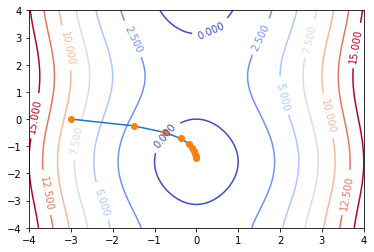

In [42]:
cs = plt.contour(X0, X1, X0**2 + np.sin(X1), cmap='coolwarm')
plt.clabel(cs, inline=1, fontsize=10)
plt.plot(xs, ys, '-')
plt.plot(xs, ys, 'o')

## To dos (notes to myself)

Refer to:

* more advanced methods (with Hessian)
* JAX

Links for myself:

* https://github.com/d3/d3-contour


Notes in general:

* memic content
* Small exercises
* Links and references
* Show this Kalman filters as a reference 